In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start = datetime.date(2021, 1, 1)
end = datetime.date(2022, 1, 1)

In [3]:
df1= web.DataReader('FB','yahoo', start, end)
df2= web.DataReader('SPY','yahoo', start, end)

In [4]:
df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-14,336.820007,329.809998,331.899994,336.769989,12250800,336.769989
2021-06-15,339.920013,335.029999,336.989990,336.750000,15795200,336.750000
2021-06-16,337.549988,328.720001,336.700012,331.079987,17232200,331.079987
2021-06-17,337.980011,330.149994,330.489990,336.510010,17794100,336.510010
2021-06-18,336.149994,329.000000,334.529999,329.660004,23039500,329.660004


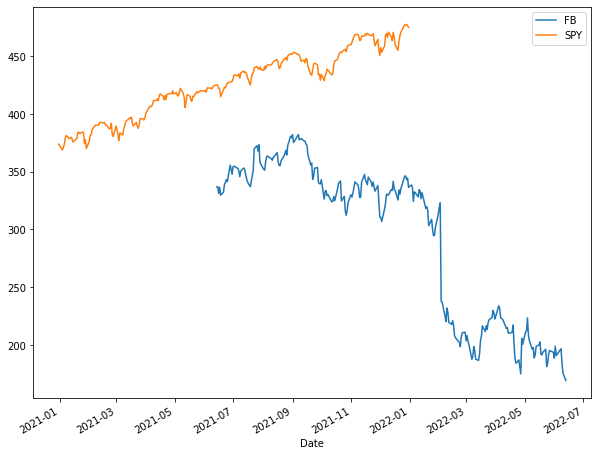

In [5]:
df1['Close'].plot(label='FB', figsize=(10, 8))
df2['Close'].plot(label='SPY')
plt.legend()

In [6]:
df1['Cumu'] = df1['Close']/df1['Close'].iloc[0]
df2['Cumu'] = df2['Close']/df2['Close'].iloc[0]

In [7]:
df1

,High,Low,Open,Close,Volume,Adj Close,Cumu
Date,,,,,,,
2021-06-14,336.820007,329.809998,331.899994,336.769989,12250800,336.769989,1.000000
2021-06-15,339.920013,335.029999,336.989990,336.750000,15795200,336.750000,0.999941
2021-06-16,337.549988,328.720001,336.700012,331.079987,17232200,331.079987,0.983104
2021-06-17,337.980011,330.149994,330.489990,336.510010,17794100,336.510010,0.999228
2021-06-18,336.149994,329.000000,334.529999,329.660004,23039500,329.660004,0.978888
...,...,...,...,...,...,...,...
2022-06-07,196.529999,191.490005,191.929993,195.649994,18828700,195.649994,0.580960
2022-06-08,202.029999,194.410004,194.669998,196.639999,22267200,196.639999,0.583900
2022-06-09,199.449997,183.679993,194.279999,184.000000,23501600,184.000000,0.546367


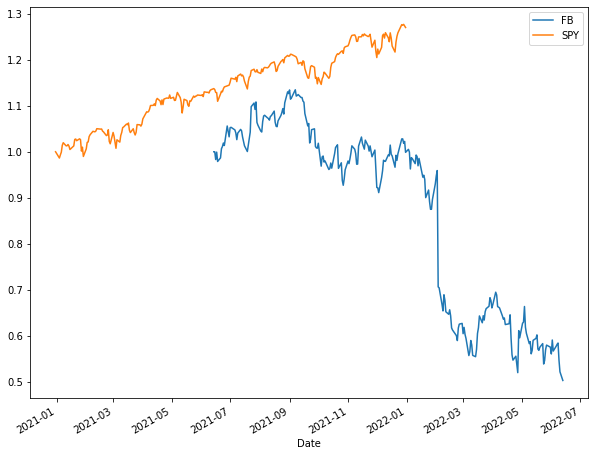

In [8]:
df1['Cumu'].plot(label = 'FB', figsize=(10,8))
df2['Cumu'].plot(label = 'SPY')
plt.legend()

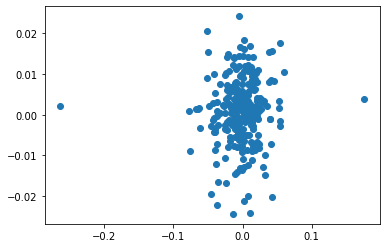

In [9]:
df1['daily_ret'] = df1['Close'].pct_change(1)
df2['daily_ret'] = df2['Close'].pct_change(1)
plt.scatter(df1['daily_ret'],df2['daily_ret'])

In [10]:
LR = stats.linregress(df1['daily_ret'].iloc[1:],df2['daily_ret'].iloc[1:])

In [11]:
LR

LinregressResult(slope=0.014111806791983941, intercept=0.0010151943214831505, rvalue=0.05372324292772928, pvalue=0.3957680638911293, stderr=0.01658909764400746, intercept_stderr=0.0005216376416351045)

In [12]:
beta,alpha,r_val,p_val,std_err = LR

In [13]:
beta

0.014111806791983941

In [14]:
alpha

0.0010151943214831505

In [15]:
rm= df1['daily_ret'].mean()*252

In [16]:
rm

-0.5567947391164909

In [17]:
ereturn = 1 + beta*(rm-1)

In [18]:
ereturn

0.9780308134268111

In [19]:
rreturn = df1['Cumu'].iloc[0]


In [20]:
rreturn

1.0

In [21]:
error = rreturn - ereturn
error

0.021969186573188915